In [2]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

input_df = pd.read_csv(r'../datasets/input_df.csv')
# print(input_df)


In [41]:
print(input_df)

   Rutting (mm)  Fatigue_Cracking (m²)  Block_Cracking (m²)  \
0           4.8                    2.0                  0.0   

   Longitudinal_Cracking (m²)  Transverse_Cracking (m²)  Patching (m²)  \
0                        26.0                       0.0          118.0   

   Potholes (Number)  Delamination (m²)  Severity_Rating  \
0                  5               18.0                0   

   Traffic_Volume (vehicles/day)  Temperature_C  Precipitation_mm  \
0                           8600           10.5             120.0   

   Maintenance_History  
0                    0  


In [40]:

label_encoder = LabelEncoder()
label_encoder.fit(["Low", "Medium", "High"])
input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
label_encoder2 = LabelEncoder()
label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])


In [42]:
scaler = MinMaxScaler()
numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                   'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                   'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                   'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

rmax = orignaldb.max()
rmin = orignaldb.min()

range_data = pd.DataFrame([rmax, rmin])

# print(range_data[numeric_columns])
scaler.fit(range_data[numeric_columns])

# print(scaler.transform(input_df[numeric_columns]))
input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])



In [43]:
model = CatBoostRegressor()
model.load_model(r"../models/trialmodels/best_catboost.cbm")

result = model.predict(input_df)


print(result)

[0.52624878]


In [ ]:
df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])
scaler2 = MinMaxScaler()
max = y.max()
min = y.min()
scaler2.fit([[min], [max]])

final = scaler2.inverse_transform([result])
# final = scaler.inverse_transform(result)
print(final)

[[30.83970624]]


[[4.8 2.0 0.0 26.0 0.0 118.0 5 18.0 'Medium' 8600 10.5 120.0
  'Minor repairs']]
[0] RESULT RAW   : [0.52624878]
[0] RESULT FINAL : [30.83970624]
[0] ACTUAL       : [20.0]
[0] DIFFERENCE   : [[10.83970624]]
---------------------------------------
[[4.4 1.5 0.0 22.0 0.0 96.0 7 13.5 'Low' 3900 12.0 85.0 'Major repairs']]
[1] RESULT RAW   : [0.52624878]
[1] RESULT FINAL : [30.83970624]
[1] ACTUAL       : [12.0]
[1] DIFFERENCE   : [[18.83970624]]
---------------------------------------
[[8.7 2.1 0.9 18.8 5.0 51.0 8 16.0 'Medium' 3800 14.8 95.0 nan]]
[2] RESULT RAW   : [0.82720942]
[2] RESULT FINAL : [41.61409706]
[2] ACTUAL       : [41.4]
[2] DIFFERENCE   : [[0.21409706]]
---------------------------------------
[[7.2 2.0 1.0 17.5 4.5 48.0 6 15.5 'High' 3500 9.0 130.0 'Major repairs']]
[3] RESULT RAW   : [0.82720942]
[3] RESULT FINAL : [41.61409706]
[3] ACTUAL       : [36.2]
[3] DIFFERENCE   : [[5.41409706]]
---------------------------------------
[[3.0 2.4 0.6 16.0 3.2 47.0 5 14.0 'Low' 70

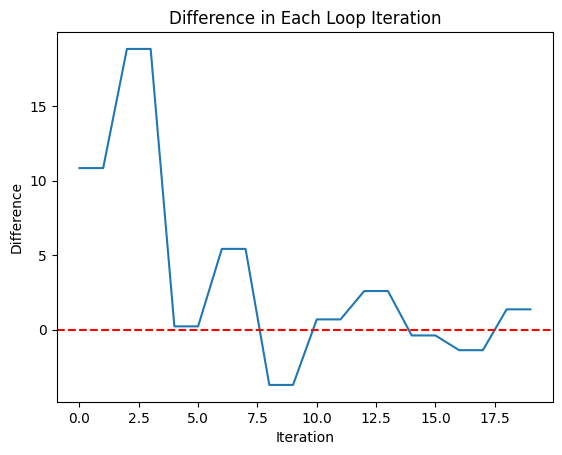

CPU times: total: 93.8 ms
Wall time: 509 ms


In [3]:
%%time
df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])

# print(df)

differences = []

for i in range(0,10):
    selectx = df.iloc[[i]].copy()
    # print(first_row_df)
    selecty = y.iloc[[i]].copy()
    # print(first_row_y)
    input_df = selectx
    print(input_df.values)
    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])
    scaler = MinMaxScaler()
    numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                    'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                    'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                    'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

    orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
    orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

    rmax = orignaldb.max()
    rmin = orignaldb.min()

    range_data = pd.DataFrame([rmax, rmin])

    # print(range_data[numeric_columns])
    scaler.fit(range_data[numeric_columns])

    # print(scaler.transform(input_df[numeric_columns]))
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])    
    model = CatBoostRegressor()
    model.load_model(r"../models/trialmodels/best_catboost.cbm")

    result = model.predict(input_df)

    scaler2 = MinMaxScaler()
    max = y.max()
    min = y.min()
    scaler2.fit([[min], [max]])

    final = scaler2.inverse_transform([result])
    # final = scaler.inverse_transform(result)
    difference = final[0] - selecty.values[0]
    differences.append(difference)
    print(f'[{i}] RESULT RAW   : {result}')
    print(f'[{i}] RESULT FINAL : {final[0]}')
    print(f'[{i}] ACTUAL       : [{selecty.values[0]}]')
    print(f'[{i}] DIFFERENCE   : [{difference}]')
    print('---------------------------------------')
    difference = final[0] - selecty.values[0]
    differences.append(difference)

plt.plot(differences)
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Difference in Each Loop Iteration')
plt.axhline(0, color='r', linestyle='--')
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Catboost: [0.77757198]
DNN: [[0.70265174]]
LGBM: [0.79297685]
XGB: [0.77857625]
TF1: [[0.63452876]]
TF2: [[0.52224326]]
TF3: [[0.63429374]]
TF4: [[0.6714641]]
FINAL PREDICTIONS :
Catboost: [39.83707689] difference =  [0.83707689]
DNN: 37.154934 difference =  -1.8450660705566406
LGBM: [40.3885713] difference =  [1.3885713]
XGB: [39.87302992] difference =  [0.87302992]
TF1: 34.71613 difference =  -4.283870697021484
TF2: 30.69631 difference =  -8.303689956665039
TF3: 34.707718 difference =  -4.2922821044921875
TF4: 36.038414 difference =  -2.9615859985351562
Actual: 39.0


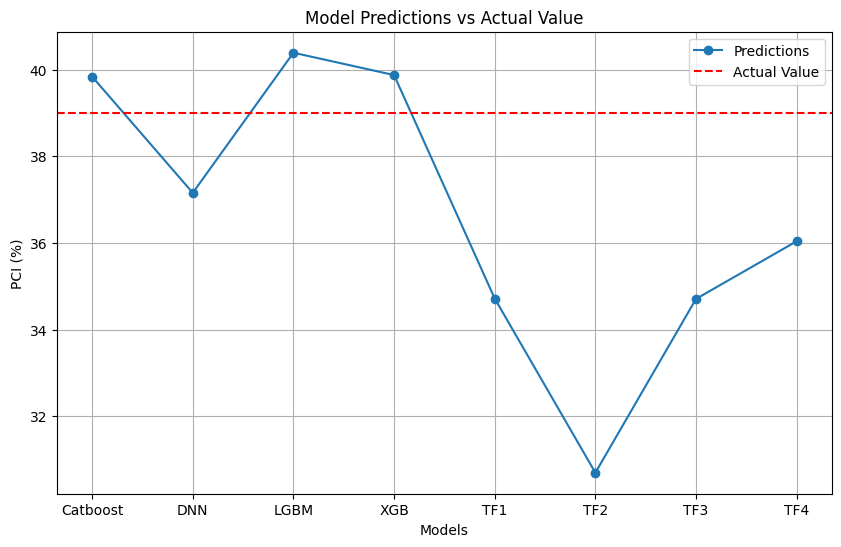

CPU times: total: 3.09 s
Wall time: 20.9 s


In [2]:
%%time
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib
import xgboost as xgb

#Rutting (mm),Fatigue_Cracking (m²),Block_Cracking (m²),Longitudinal_Cracking (m²),Transverse_Cracking (m²),Patching (m²),Potholes (Number),Delamination (m²),Severity_Rating,Traffic_Volume (vehicles/day),Temperature_C,Precipitation_mm,Maintenance_History

orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

rmax = orignaldb.max()
rmin = orignaldb.min()

range_data = pd.DataFrame([rmax, rmin])

# ogdf = pd.read_csv(r'../datasets/pci_data_50.csv')
# ogy = ogdf['PCI (%)']
# ogdf = ogdf.drop(columns=['PCI (%)']) 
# rmax = ogdf.max()
# rmin = ogdf.min()
# range_data = pd.DataFrame([rmax, rmin])

# ymax = ogy.max()
# ymin = ogy.min()
# yrange = pd.DataFrame([ymax, ymin])

df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])
label_encoder = LabelEncoder()
label_encoder.fit(["Low", "Medium", "High"])
df['Severity_Rating'] = label_encoder.fit_transform(df['Severity_Rating'])
label_encoder2 = LabelEncoder()
label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
df['Maintenance_History'] = label_encoder2.fit_transform(df['Maintenance_History'])

rmin1 = df.min()
rmax1 = df.max()
ymax = y.max()
ymin = y.min()
yrange = pd.DataFrame([ymax, ymin])
range_data2 = pd.DataFrame([rmax1, rmin1])


def predict_all_models(Rutting ,Fatigue_Cracking ,Block_Cracking ,Longitudinal_Cracking ,Transverse_Cracking ,Patching ,Potholes ,Delamination ,Severity_Rating,Traffic_Volume ,Temperature_C,Precipitation_mm,Maintenance_History):
    # Load the data
    input_df = pd.DataFrame({
        'Rutting (mm)': [Rutting],
        'Fatigue_Cracking (m²)': [Fatigue_Cracking],
        'Block_Cracking (m²)': [Block_Cracking],
        'Longitudinal_Cracking (m²)': [Longitudinal_Cracking],
        'Transverse_Cracking (m²)': [Transverse_Cracking],
        'Patching (m²)': [Patching],
        'Potholes (Number)': [Potholes],
        'Delamination (m²)': [Delamination],
        'Severity_Rating': [Severity_Rating],
        'Traffic_Volume (vehicles/day)': [Traffic_Volume],
        'Temperature_C': [Temperature_C],
        'Precipitation_mm': [Precipitation_mm],
        'Maintenance_History': [Maintenance_History]
    })

    # Load the models
    model_catboost = CatBoostRegressor()
    model_catboost.load_model(r"../models/trialmodels/best_catboost.cbm")

    model_dnn = load_model(r"../models/trialmodels/model_dnn.keras")
    
    model_lgbm = joblib.load(r"../models/trialmodels/best_lgbm.pkl")

    model_xgb = xgb.Booster()
    model_xgb.load_model(r"../models/trialmodels/best_xgb_model.json")

    model_tf_1 = load_model(r"../models/trialmodels/model1.keras")

    model_tf_2 = load_model(r"../models/trialmodels/model2.keras")

    model_tf_3 = load_model(r"../models/trialmodels/model3.keras")

    model_tf_4 = load_model(r"../models/trialmodels/model4.keras")

    # preprocess the input

    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])

    scaler = MinMaxScaler()
    numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                    'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                    'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                    'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

    # print(range_data[numeric_columns])
    scaler.fit(range_data2[numeric_columns])

    # print(scaler.transform(input_df[numeric_columns]))
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
    
    #remove header
    # input_df_headless = input_df.values
    input_df_headless = input_df.values
    # print('input_df_headless = ',input_df_headless)

    # Predict using the models
    pred_catboost = model_catboost.predict(input_df)
    pred_dnn = model_dnn.predict(input_df_headless)
    pred_lgbm = model_lgbm.predict(input_df)
    pred_xgb = model_xgb.predict(xgb.DMatrix(input_df))
    pred_tf_1 = model_tf_1.predict(input_df_headless)
    pred_tf_2 = model_tf_2.predict(input_df_headless)
    pred_tf_3 = model_tf_3.predict(input_df_headless)
    pred_tf_4 = model_tf_4.predict(input_df_headless)

    print('Catboost:', pred_catboost)
    print('DNN:', pred_dnn)
    print('LGBM:', pred_lgbm)
    print('XGB:', pred_xgb)
    print('TF1:', pred_tf_1)
    print('TF2:', pred_tf_2)
    print('TF3:', pred_tf_3)
    print('TF4:', pred_tf_4)


    # pred_catboost = pred_catboost * (ymax - ymin) + ymin
    # pred_dnn = pred_dnn * (ymax - ymin) + ymin
    # pred_lgbm = pred_lgbm * (ymax - ymin) + ymin
    # pred_xgb = pred_xgb * (ymax - ymin) + ymin
    # pred_tf_1 = pred_tf_1 * (ymax - ymin) + ymin
    # pred_tf_2 = pred_tf_2 * (ymax - ymin) + ymin
    # pred_tf_3 = pred_tf_3 * (ymax - ymin) + ymin
    # pred_tf_4 = pred_tf_4 * (ymax - ymin) + ymin

    # Unscale the predictions
    scaler2 = MinMaxScaler()
    scaler2.fit([[ymin], [ymax]])
    pred_catboost = scaler2.inverse_transform([pred_catboost])
    pred_dnn = scaler2.inverse_transform(pred_dnn)
    pred_lgbm = scaler2.inverse_transform([pred_lgbm])
    pred_xgb = scaler2.inverse_transform([pred_xgb])
    pred_tf_1 = scaler2.inverse_transform(pred_tf_1)
    pred_tf_2 = scaler2.inverse_transform(pred_tf_2)
    pred_tf_3 = scaler2.inverse_transform(pred_tf_3)
    pred_tf_4 = scaler2.inverse_transform(pred_tf_4)


    return pred_catboost[0], pred_dnn[0][0], pred_lgbm[0], pred_xgb[0], pred_tf_1[0][0], pred_tf_2[0][0], pred_tf_3[0][0], pred_tf_4[0][0]

# test data

ans = predict_all_models(3.9, 1.7, 0.3, 18.2, 3.5, 50.0, 6, 13.5, 'Low', 8200, 10.1, 102.0, 'Major repairs')
print('FINAL PREDICTIONS :')
print('Catboost:', ans[0] , 'difference = ', ans[0] - 39.0)
print('DNN:', ans[1], 'difference = ', ans[1] - 39.0)
print('LGBM:', ans[2], 'difference = ', ans[2] - 39.0)
print('XGB:', ans[3], 'difference = ', ans[3] - 39.0)
print('TF1:', ans[4], 'difference = ', ans[4] - 39.0)
print('TF2:', ans[5], 'difference = ', ans[5] - 39.0)
print('TF3:', ans[6], 'difference = ', ans[6] - 39.0)
print('TF4:', ans[7], 'difference = ', ans[7] - 39.0)
print('Actual:', 39.0)

#make a plot
# Plot the predictions
models = ['Catboost', 'DNN', 'LGBM', 'XGB', 'TF1', 'TF2', 'TF3', 'TF4']
predictions = [ans[0][0], ans[1], ans[2][0], ans[3][0], ans[4], ans[5], ans[6], ans[7]]
actual_value = 39.0

plt.figure(figsize=(10, 6))
plt.plot(models, predictions, marker='o', label='Predictions')
plt.axhline(y=actual_value, color='r', linestyle='--', label='Actual Value')
plt.xlabel('Models')
plt.ylabel('PCI (%)')
plt.title('Model Predictions vs Actual Value')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])

# print(df)
df = df.replace({np.nan: 'None'})

differences = []

for i in range(0,15):
    selectx = df.iloc[[i]].copy()
    # print(first_row_df)
    selecty = y.iloc[[i]].copy()
    # print(first_row_y)
    input_df = selectx
    output = selecty
    print(input_df.values.tolist()[0])
    print(output.values)

[4.8, 2.0, 0.0, 26.0, 0.0, 118.0, 5, 18.0, 'Medium', 8600, 10.5, 120.0, 'Minor repairs']
[20.]
[4.4, 1.5, 0.0, 22.0, 0.0, 96.0, 7, 13.5, 'Low', 3900, 12.0, 85.0, 'Major repairs']
[12.]
[8.7, 2.1, 0.9, 18.8, 5.0, 51.0, 8, 16.0, 'Medium', 3800, 14.8, 95.0, 'None']
[41.4]
[7.2, 2.0, 1.0, 17.5, 4.5, 48.0, 6, 15.5, 'High', 3500, 9.0, 130.0, 'Major repairs']
[36.2]
[3.0, 2.4, 0.6, 16.0, 3.2, 47.0, 5, 14.0, 'Low', 7000, 7.2, 110.0, 'Minor repairs']
[45.]
[2.8, 1.8, 0.5, 15.0, 2.8, 44.0, 4, 13.0, 'Medium', 4500, 5.8, 98.0, 'None']
[40.]
[5.6, 1.9, 0.4, 19.0, 4.0, 46.0, 6, 12.5, 'Low', 2000, 11.3, 105.0, 'Major repairs']
[38.]
[6.2, 2.3, 0.7, 20.5, 4.2, 45.0, 7, 14.0, 'Medium', 1000, 8.7, 115.0, 'None']
[42.]
[8.1, 2.2, 0.8, 21.8, 3.9, 48.0, 8, 15.0, 'High', 1300, 13.2, 90.0, 'Minor repairs']
[43.]
[3.9, 1.7, 0.3, 18.2, 3.5, 50.0, 6, 13.5, 'Low', 8200, 10.1, 102.0, 'Major repairs']
[39.]
[6.5, 2.5, 0.9, 24.0, 5.1, 37.0, 9, 12.0, 'Medium', 3600, 15.0, 100.0, 'None']
[35.]
[7.0, 2.2, 0.6, 20.1, 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Catboost: [0.84316253]
DNN: [[0.5478628]]
LGBM: [0.79297685]
XGB: [0.83965474]
TF1: [[0.73922807]]
TF2: [[0.58639336]]
TF3: [[0.70976436]]
TF4: [[0.6846203]]
FINAL PREDICTIONS :
Catboost: [42.18521871] difference =  [3.68521871]
DNN: 31.61349 difference =  -6.886510848999023
LGBM: [40.3885713] difference =  [1.8885713]
XGB: [42.05963982] difference =  [3.55963982]
TF1: 38.464363 difference =  -0.03563690185546875
TF2: 32.99288 difference =  -5.507118225097656
TF3: 37.409565 difference =  -1.0904350280761719
TF4: 36.509407 difference =  -1.9905929565429688
Actual: 38.5


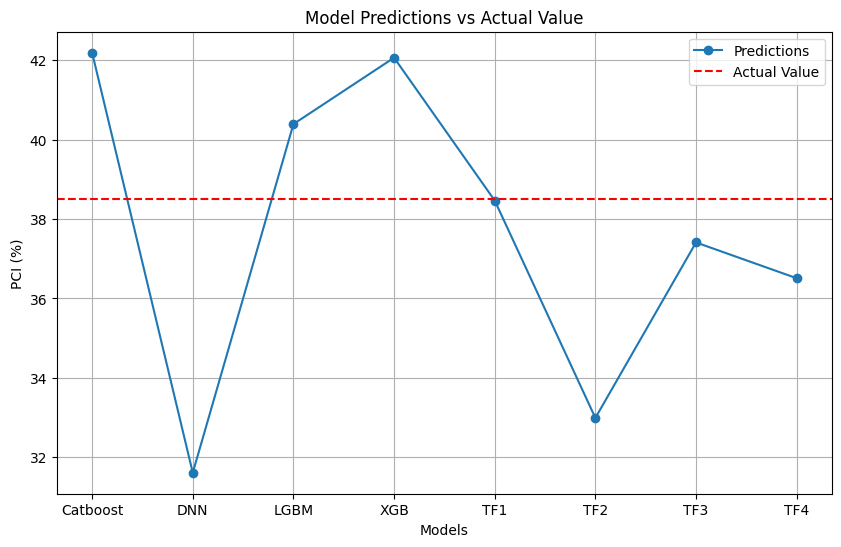

In [6]:
ans = predict_all_models(5.1, 2.1, 0.5, 18.3, 4.0, 42.5, 7, 15.1, 'Medium', 1400, 9.7, 97.0, 'None')
print('FINAL PREDICTIONS :')

actual_value = 38.5

print('Catboost:', ans[0] , 'difference = ', ans[0] - actual_value)
print('DNN:', ans[1], 'difference = ', ans[1] - actual_value)
print('LGBM:', ans[2], 'difference = ', ans[2] - actual_value)
print('XGB:', ans[3], 'difference = ', ans[3] - actual_value)
print('TF1:', ans[4], 'difference = ', ans[4] - actual_value)
print('TF2:', ans[5], 'difference = ', ans[5] - actual_value)
print('TF3:', ans[6], 'difference = ', ans[6] - actual_value)
print('TF4:', ans[7], 'difference = ', ans[7] - actual_value)


print('Actual:', actual_value)

#make a plot
# Plot the predictions
models = ['Catboost', 'DNN', 'LGBM', 'XGB', 'TF1', 'TF2', 'TF3', 'TF4']
predictions = [ans[0][0], ans[1], ans[2][0], ans[3][0], ans[4], ans[5], ans[6], ans[7]]


plt.figure(figsize=(10, 6))
plt.plot(models, predictions, marker='o', label='Predictions')
plt.axhline(y=actual_value, color='r', linestyle='--', label='Actual Value')
plt.xlabel('Models')
plt.ylabel('PCI (%)')
plt.title('Model Predictions vs Actual Value')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig(r'../results/model_predictions2.png', dpi=400, bbox_inches='tight')

In [11]:
import base64
fig = open(r'../results/model_predictions2.png', 'rb')
bfig = base64.b64encode(fig.read())
# print(bfig)
f = open(r'../results/model_predictions_base64.b64', 'wb')
f.write((bfig))
f.close()
fig.close()

In [12]:
f = open(r'../results/model_predictions_base64.b64', 'rb')
bdata = f.read()
f.close()
data = base64.b64decode(bdata)
f = open(r'../results/model_predictions3.png', 'wb')
f.write(data)
f.close()

In [ ]:
def input(Rutting ,Fatigue_Cracking ,Block_Cracking ,Longitudinal_Cracking ,Transverse_Cracking ,Patching ,Potholes ,Delamination ,Severity_Rating,Traffic_Volume ,Temperature_C,Precipitation_mm,Maintenance_History):
    # Load the data
    input_df = pd.DataFrame({
        'Rutting (mm)': [Rutting],
        'Fatigue_Cracking (m²)': [Fatigue_Cracking],
        'Block_Cracking (m²)': [Block_Cracking],
        'Longitudinal_Cracking (m²)': [Longitudinal_Cracking],
        'Transverse_Cracking (m²)': [Transverse_Cracking],
        'Patching (m²)': [Patching],
        'Potholes (Number)': [Potholes],
        'Delamination (m²)': [Delamination],
        'Severity_Rating': [Severity_Rating],
        'Traffic_Volume (vehicles/day)': [Traffic_Volume],
        'Temperature_C': [Temperature_C],
        'Precipitation_mm': [Precipitation_mm],
        'Maintenance_History': [Maintenance_History]
    })
    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])

    scaler = MinMaxScaler()
    numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                        'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                        'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                        'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

    df = pd.read_csv(r'../datasets/pci_data_50.csv')
    y = df['PCI (%)']
    df = df.drop(columns=['PCI (%)'])
    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    df['Severity_Rating'] = label_encoder.fit_transform(df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    df['Maintenance_History'] = label_encoder2.fit_transform(df['Maintenance_History'])



    orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
    orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

    rmax = df.max()
    rmin = df.min()

    range_data = pd.DataFrame([rmax, rmin])

    # print(range_data[numeric_columns])
    scaler.fit(range_data[numeric_columns])

        # print(scaler.transform(input_df[numeric_columns]))
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns]) 
    return input_df
a = (input(3.9, 1.7, 0.3, 18.2, 3.5, 50.0, 6, 13.5, 'Low', 8200, 10.1, 102.0, 'Major repairs'))

In [20]:
a

,Rutting (mm),Fatigue_Cracking (m²),Block_Cracking (m²),Longitudinal_Cracking (m²),Transverse_Cracking (m²),Patching (m²),Potholes (Number),Delamination (m²),Severity_Rating,Traffic_Volume (vehicles/day),Temperature_C,Precipitation_mm,Maintenance_History
0,0.193548,0.2,0.3,0.290909,0.660377,0.160494,0.285714,0.25,0.0,0.948718,0.467391,0.44,0.0


In [27]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib
import xgboost as xgb
import base64

#Rutting (mm),Fatigue_Cracking (m²),Block_Cracking (m²),Longitudinal_Cracking (m²),Transverse_Cracking (m²),Patching (m²),Potholes (Number),Delamination (m²),Severity_Rating,Traffic_Volume (vehicles/day),Temperature_C,Precipitation_mm,Maintenance_History
orignaldb = pd.read_csv(r'../datasets/htrain.csv')   
orignaly = pd.read_csv(r'../datasets/hy_train.csv')   

rmax = orignaldb.max()
rmin = orignaldb.min()

range_data = pd.DataFrame([rmax, rmin])

# ogdf = pd.read_csv(r'../datasets/pci_data_50.csv')
# ogy = ogdf['PCI (%)']
# ogdf = ogdf.drop(columns=['PCI (%)']) 
# rmax = ogdf.max()
# rmin = ogdf.min()
# range_data = pd.DataFrame([rmax, rmin])

# ymax = ogy.max()
# ymin = ogy.min()
# yrange = pd.DataFrame([ymax, ymin])

df = pd.read_csv(r'../datasets/pci_data_50.csv')
y = df['PCI (%)']
df = df.drop(columns=['PCI (%)'])
label_encoder = LabelEncoder()
label_encoder.fit(["Low", "Medium", "High"])
df['Severity_Rating'] = label_encoder.fit_transform(df['Severity_Rating'])
label_encoder2 = LabelEncoder()
label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
df['Maintenance_History'] = label_encoder2.fit_transform(df['Maintenance_History'])

rmin1 = df.min()
rmax1 = df.max()
ymax = y.max()
ymin = y.min()
yrange = pd.DataFrame([ymax, ymin])
range_data2 = pd.DataFrame([rmax1, rmin1])


def predict_all_models2(Rutting ,Fatigue_Cracking ,Block_Cracking ,Longitudinal_Cracking ,Transverse_Cracking ,Patching ,Potholes ,Delamination ,Severity_Rating,Traffic_Volume ,Temperature_C,Precipitation_mm,Maintenance_History):
    # Load the data
    input_df = pd.DataFrame({
        'Rutting (mm)': [Rutting],
        'Fatigue_Cracking (m²)': [Fatigue_Cracking],
        'Block_Cracking (m²)': [Block_Cracking],
        'Longitudinal_Cracking (m²)': [Longitudinal_Cracking],
        'Transverse_Cracking (m²)': [Transverse_Cracking],
        'Patching (m²)': [Patching],
        'Potholes (Number)': [Potholes],
        'Delamination (m²)': [Delamination],
        'Severity_Rating': [Severity_Rating],
        'Traffic_Volume (vehicles/day)': [Traffic_Volume],
        'Temperature_C': [Temperature_C],
        'Precipitation_mm': [Precipitation_mm],
        'Maintenance_History': [Maintenance_History]
    })

    # Load the models
    model_catboost = CatBoostRegressor()
    model_catboost.load_model(r"../models/trialmodels/best_catboost.cbm")
    # model_catboost = joblib.load(r"../models/trialmodels/testing/catboost_model.pkl")

    

    model_dnn = load_model(r"../models/trialmodels/model_dnn.keras")
    
    model_lgbm = joblib.load(r"../models/trialmodels/best_lgbm.pkl")

    model_xgb = xgb.Booster()
    model_xgb.load_model(r"../models/trialmodels/best_xgb_model.json")

    model_tf_1 = load_model(r"../models/trialmodels/model1.keras")

    model_tf_2 = load_model(r"../models/trialmodels/model2.keras")

    model_tf_3 = load_model(r"../models/trialmodels/model3.keras")

    model_tf_4 = load_model(r"../models/trialmodels/model4.keras")

    #new models
    rf_model = joblib.load(r'../models/trialmodels/random_forest_model.pkl')
    stacking_regressor = joblib.load(r'../models/trialmodels/stacking_regressor_model.pkl')
    gb_model_loaded = joblib.load(r'../models/trialmodels/gradient_boosting_model.pkl')
    extra_tree_model = joblib.load(r'../models/trialmodels/testing/extratrees_model.pkl')

    knn_model = joblib.load(r'../models/trialmodels/testing/knn_model.pkl')
    svr_model = joblib.load(r'../models/trialmodels/testing/svr_model.pkl')
    ada_model = joblib.load(r'../models/trialmodels/testing/adaboost_model.pkl')
    bagging_model = joblib.load(r'../models/trialmodels/testing/bagging_model.pkl')
    elastic_net_model = joblib.load(r'../models/trialmodels/testing/elasticnet_model.pkl')


    # preprocess the input

    label_encoder = LabelEncoder()
    label_encoder.fit(["Low", "Medium", "High"])
    input_df['Severity_Rating'] = label_encoder.fit_transform(input_df['Severity_Rating'])
    label_encoder2 = LabelEncoder()
    label_encoder2.fit(["None", "Minor repairs", "Major repairs"])
    input_df['Maintenance_History'] = label_encoder2.fit_transform(input_df['Maintenance_History'])

    scaler = MinMaxScaler()
    numeric_columns = ['Rutting (mm)', 'Fatigue_Cracking (m²)', 'Block_Cracking (m²)', 
                    'Longitudinal_Cracking (m²)', 'Transverse_Cracking (m²)', 
                    'Patching (m²)', 'Potholes (Number)', 'Delamination (m²)', 
                    'Traffic_Volume (vehicles/day)', 'Temperature_C', 'Precipitation_mm','Severity_Rating','Maintenance_History']

    # print(range_data[numeric_columns])
    scaler.fit(range_data2[numeric_columns])

    # print(scaler.transform(input_df[numeric_columns]))
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
    
    #remove header
    # input_df_headless = input_df.values
    input_df_headless = input_df.values
    # print('input_df_headless = ',input_df_headless)

    # Predict using the models
    pred_catboost = model_catboost.predict(input_df)
    pred_dnn = model_dnn.predict(input_df_headless)
    pred_lgbm = model_lgbm.predict(input_df)
    pred_xgb = model_xgb.predict(xgb.DMatrix(input_df))
    pred_tf_1 = model_tf_1.predict(input_df_headless)
    pred_tf_2 = model_tf_2.predict(input_df_headless)
    pred_tf_3 = model_tf_3.predict(input_df_headless)
    pred_tf_4 = model_tf_4.predict(input_df_headless)

    pred_rf = rf_model.predict(input_df)
    pred_stacking = stacking_regressor.predict(input_df)
    pred_gb = gb_model_loaded.predict(input_df)
    pred_extra_tree = extra_tree_model.predict(input_df)
    pred_knn = knn_model.predict(input_df)
    pred_svr = svr_model.predict(input_df)
    pred_ada = ada_model.predict(input_df)
    pred_bagging = bagging_model.predict(input_df)
    pred_elastic_net = elastic_net_model.predict(input_df)


    print('Catboost:', pred_catboost)
    print('DNN:', pred_dnn)
    print('LGBM:', pred_lgbm)
    print('XGB:', pred_xgb)
    print('TF1:', pred_tf_1)
    print('TF2:', pred_tf_2)
    print('TF3:', pred_tf_3)
    print('TF4:', pred_tf_4)
    print('RF:', pred_rf)
    print('Stacking:', pred_stacking)
    print('GB:', pred_gb)
    print('Extra Tree:', pred_extra_tree)
    print('KNN:', pred_knn)
    print('SVR:', pred_svr)
    print('ADA:', pred_ada)
    print('Bagging:', pred_bagging)
    print('Elastic Net:', pred_elastic_net)


    # pred_catboost = pred_catboost * (ymax - ymin) + ymin
    # pred_dnn = pred_dnn * (ymax - ymin) + ymin
    # pred_lgbm = pred_lgbm * (ymax - ymin) + ymin
    # pred_xgb = pred_xgb * (ymax - ymin) + ymin
    # pred_tf_1 = pred_tf_1 * (ymax - ymin) + ymin
    # pred_tf_2 = pred_tf_2 * (ymax - ymin) + ymin
    # pred_tf_3 = pred_tf_3 * (ymax - ymin) + ymin
    # pred_tf_4 = pred_tf_4 * (ymax - ymin) + ymin

    # Unscale the predictions
    scaler2 = MinMaxScaler()
    scaler2.fit([[ymin], [ymax]])
    pred_catboost = scaler2.inverse_transform([pred_catboost])
    pred_dnn = scaler2.inverse_transform(pred_dnn)
    pred_lgbm = scaler2.inverse_transform([pred_lgbm])
    pred_xgb = scaler2.inverse_transform([pred_xgb])
    pred_tf_1 = scaler2.inverse_transform(pred_tf_1)
    pred_tf_2 = scaler2.inverse_transform(pred_tf_2)
    pred_tf_3 = scaler2.inverse_transform(pred_tf_3)
    pred_tf_4 = scaler2.inverse_transform(pred_tf_4)

    pred_rf = scaler2.inverse_transform([pred_rf])
    pred_stacking = scaler2.inverse_transform([pred_stacking])
    pred_gb = scaler2.inverse_transform([pred_gb])
    pred_extra_tree = scaler2.inverse_transform([pred_extra_tree])
    pred_knn = scaler2.inverse_transform([pred_knn])
    pred_svr = scaler2.inverse_transform([pred_svr])
    pred_ada = scaler2.inverse_transform([pred_ada])
    pred_bagging = scaler2.inverse_transform([pred_bagging])
    pred_elastic_net = scaler2.inverse_transform([pred_elastic_net])



    return pred_catboost[0], pred_dnn[0][0], pred_lgbm[0], pred_xgb[0], pred_tf_1[0][0], pred_tf_2[0][0], pred_tf_3[0][0], pred_tf_4[0][0], pred_rf[0], pred_stacking[0], pred_gb[0], pred_extra_tree[0], pred_knn[0], pred_svr[0], pred_ada[0], pred_bagging[0], pred_elastic_net[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Catboost: [0.84316253]
DNN: [[0.5478628]]
LGBM: [0.79297685]
XGB: [0.83965474]
TF1: [[0.73922807]]
TF2: [[0.58639336]]
TF3: [[0.70976436]]
TF4: [[0.6846203]]
RF: [0.85695531]
Stacking: [0.80252923]
GB: [0.88614364]
Extra Tree: [41.253]
KNN: [40.7]
SVR: [42.71565215]
ADA: [42.14375]
Bagging: [42.111]
Elastic Net: [40.78287]
FINAL PREDICTIONS :
Catboost: [42.18521871] difference =  [3.68521871]
DNN: 31.61349 difference =  -6.886510848999023
LGBM: [40.3885713] difference =  [1.8885713]
XGB: [42.05963982] difference =  [3.55963982]
TF1: 38.464363 difference =  -0.03563690185546875
TF2: 32.99288 difference =  -5.507118225097656
TF3: 37.409565 difference =  -1.0904350280761719
TF4: 36.509407 difference =  -1.9905929565429688
RF: [42.679] difference =  [4.179]
Stacking: [40.7305465] difference =  [2.230546

d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(
d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
d:\programming\projects\pavement-prediction\.pave\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
d:\programming\projects\pavement-pre

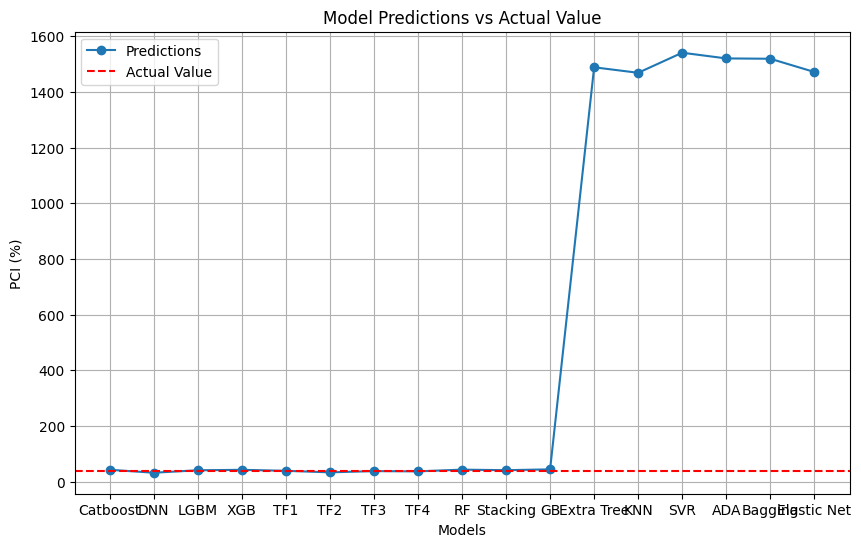

In [28]:
ans = predict_all_models2(5.1, 2.1, 0.5, 18.3, 4.0, 42.5, 7, 15.1, 'Medium', 1400, 9.7, 97.0, 'None')
print('FINAL PREDICTIONS :')

actual_value = 38.5

print('Catboost:', ans[0] , 'difference = ', ans[0] - actual_value)
print('DNN:', ans[1], 'difference = ', ans[1] - actual_value)
print('LGBM:', ans[2], 'difference = ', ans[2] - actual_value)
print('XGB:', ans[3], 'difference = ', ans[3] - actual_value)
print('TF1:', ans[4], 'difference = ', ans[4] - actual_value)
print('TF2:', ans[5], 'difference = ', ans[5] - actual_value)
print('TF3:', ans[6], 'difference = ', ans[6] - actual_value)
print('TF4:', ans[7], 'difference = ', ans[7] - actual_value)
print('RF:', ans[8], 'difference = ', ans[8] - actual_value)
print('Stacking:', ans[9], 'difference = ', ans[9] - actual_value)
print('GB:', ans[10], 'difference = ', ans[10] - actual_value)
print('Extra Tree:', ans[11], 'difference = ', ans[11] - actual_value)
print('KNN:', ans[12], 'difference = ', ans[12] - actual_value)
print('SVR:', ans[13], 'difference = ', ans[13] - actual_value)
print('ADA:', ans[14], 'difference = ', ans[14] - actual_value)
print('Bagging:', ans[15], 'difference = ', ans[15] - actual_value)
print('Elastic Net:', ans[16], 'difference = ', ans[16] - actual_value)


print('Actual:', actual_value)

#make a plot
# Plot the predictions
models = ['Catboost', 'DNN', 'LGBM', 'XGB', 'TF1', 'TF2', 'TF3', 'TF4', 'RF', 'Stacking', 'GB', 'Extra Tree', 'KNN', 'SVR', 'ADA', 'Bagging','Elastic Net']
predictions = [ans[0][0], ans[1], ans[2][0], ans[3][0], ans[4], ans[5], ans[6], ans[7], ans[8][0], ans[9][0], ans[10][0], ans[11][0], ans[12][0], ans[13][0], ans[14][0], ans[15][0], ans[16][0]]


plt.figure(figsize=(10, 6))
plt.plot(models, predictions, marker='o', label='Predictions')
plt.axhline(y=actual_value, color='r', linestyle='--', label='Actual Value')
plt.xlabel('Models')
plt.ylabel('PCI (%)')
plt.title('Model Predictions vs Actual Value')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import requests
import json

url = "https://aiapigate.pythonanywhere.com/api/v1//predict_from_ngrok"

payload = json.dumps({
  "Rutting": 3.9,
  "Fatigue_Cracking": 1.7,
  "Block_Cracking": 0.3,
  "Longitudinal_Cracking": 18.2,
  "Transverse_Cracking": 3.5,
  "Patching": 50,
  "Potholes": 6,
  "Delamination": 13.5,
  "Severity_Rating": "Low",
  "Traffic_Volume": 8200,
  "Temperature_C": 10.1,
  "Precipitation_mm": 102,
  "Maintenance_History": "Major repairs"
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"image_base64":"iVBORw0KGgoAAAANSUhEUgAADSUAAAiGCAYAAACibUAjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAD2EAAA9hAHVrK90AAEAAElEQVR4nOzdd3RV1fb//U86pEKAhB56R0BAQHqXJiIgVUBQsYuiWFBAv1jRK1julSItFIXQizRpQXov0iE0qYGQRkLKef7wwZ949k5OSwHerzEyxmWtveeap+1zjnfNM90sFotFAAAAAAAAAAAAAAAAAAAAAAAAAGAj95xOAAAAAAAAAAAAAAAAAAAAAAAAAMC9haIkAAAAAAAAAAAAAAAAAAAAAAAAAHahKAkAAAAAAAAAAAAAAAAAAAAAAACAXShKAgAAAAAAAAAAAAAAAAAAAAAAAGAXipIAAAAAAAAAAAAAAAAAAAAAAAAA2IWiJAAAAAAAAAAAAAAAAAAAAAAAAAB2oSgJAAAAAAAAAAAAAAAAAAAAAAAAgF0oSgIAAAAAAAAAAAAAAAAAAAAAAABgF4qSAAAAAAAAAAAAAAAAAAAAAAAAANiFoiQAAAAAAAAAAAAAAAAAAAAAAAAAdqEoCQAAAAAAAAAAAAAAAAAAAAAAAIBdKEoCAAAAAAAAAAAAAAAAAAAAAAAAYBeKkgAAAAAAAAAAAAAAAAAAAAAAAADYhaIkAAAAAAAAAAAAAAAAAAAAAAAAAHahKAkAAAAAAAAAAAAAAAAAAAAAAACAXShKAgAAAAAAAAAAAAAAAAAAAAAAAGAXipIAAAAAAAAAAAAAAAAAAAAAAAAA2IWiJAAAAAAAAAAAAAAAAAAAAAAAAAB2oSgJAAAAAAAAAAAAAAAAAAAAAAAAgF0oSgIAAAAAAAAAAAAAAAAAAAAAAABgF4qSAAAAAAAAAAAAAAAAAAAAAAAAANiFoiQAAAAAAAA

In [5]:
open('sample_json_response.json', 'w').write((d:=json.dumps(a, indent=4)))    

291386

In [29]:
import base64
b = a['image_base64']
img = base64.b64decode(b)
with open('image.jpg', 'wb') as f:
    f.write(img)
    f.close()

In [ ]:
# import React, { useState } from 'react';
# import { saveAs } from 'file-saver';

# const App = () => {
#   const [predictions, setPredictions] = useState(null);
#   const [imageUrl, setImageUrl] = useState('');

#   const fetchData = async () => {
#     try {
#         const myHeaders = new Headers();
#         myHeaders.append("Content-Type", "application/json");

#         const raw = JSON.stringify({
#         "Rutting": 3.9,
#         "Fatigue_Cracking": 1.7,
#         "Block_Cracking": 0.3,
#         "Longitudinal_Cracking": 18.2,
#         "Transverse_Cracking": 3.5,
#         "Patching": 50,
#         "Potholes": 6,
#         "Delamination": 13.5,
#         "Severity_Rating": "Low",
#         "Traffic_Volume": 8200,
#         "Temperature_C": 10.1,
#         "Precipitation_mm": 102,
#         "Maintenance_History": "Major repairs"
#         });

#         const requestOptions = {
#         method: "POST",
#         headers: myHeaders,
#         body: raw,
#         redirect: "follow"
#         };

#       const response = await fetch("https://aiapigate.pythonanywhere.com/api/v1//predict_from_ngrok", requestOptions);

#       if (!response.ok) {
#         throw new Error('Network response was not ok');
#       }

#       const data = await response.json();

#       // Extract the image_base64 value
#       const imageBase64 = data.image_base64;

#        // Create a data URL for the image
#       const imageUrl = `data:image/png;base64,${imageBase64}`;
#       setImageUrl(imageUrl);

#       // Decode and save the image
#       const byteCharacters = atob(imageBase64);
#       const byteNumbers = new Array(byteCharacters.length);
#       for (let i = 0; i < byteCharacters.length; i++) {
#         byteNumbers[i] = byteCharacters.charCodeAt(i);
#       }
#       const byteArray = new Uint8Array(byteNumbers);
#       const blob = new Blob([byteArray], { type: 'image/png' });
#       saveAs(blob, 'image.png');

#       // Set predictions to state
#       setPredictions(data.predictions);
#     } catch (error) {
#       console.error('Error fetching data:', error);
#     }
#   };

#   return (
#     <div>
#       <button onClick={fetchData}>Fetch Data</button>
#       {predictions && (
#         <div>
#           <h1>Predictions</h1>
#           <ul>
#             {Object.entries(predictions).map(([model, prediction]) => (
#               <li key={model}>
#                 {model}: {prediction}
#               </li>
#             ))}
#           </ul>
#         </div>
#       )}
#       {imageUrl && (
#         <div>
#           <h2>Image</h2>
#           <img src={imageUrl} alt="Predicted Result" />
#         </div>
#       )}
#     </div>
#   );
# };

# export default App;